# Importing libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
#import the dataset
df = pd.read_csv('ratings_Electronics.csv',header=None)

#Adding column names
df.columns = ['user_id','product_id','rating','timestamp']

#Dropping timestamp column
df.drop(columns = ['timestamp'],inplace=True)

#Displaying top 5 rows
df.head(5)

,user_id,product_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# Shape

In [3]:
#shape of the df
rows, columns = df.shape
print("No. of rows: ",rows)
print("No. of columns: ",columns)

No. of rows:  7824482
No. of columns:  3


# Missing values analysis

In [4]:
#checking for null values if any
df.isnull().sum()

user_id       0
product_id    0
rating        0
dtype: int64

# Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     object 
 1   product_id  object 
 2   rating      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB



finally get the summary and check

rating distribution.
number of users and products.
Users with highest no of ratings.

# Summary

In [6]:
df.describe()

,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


# Rating distribution

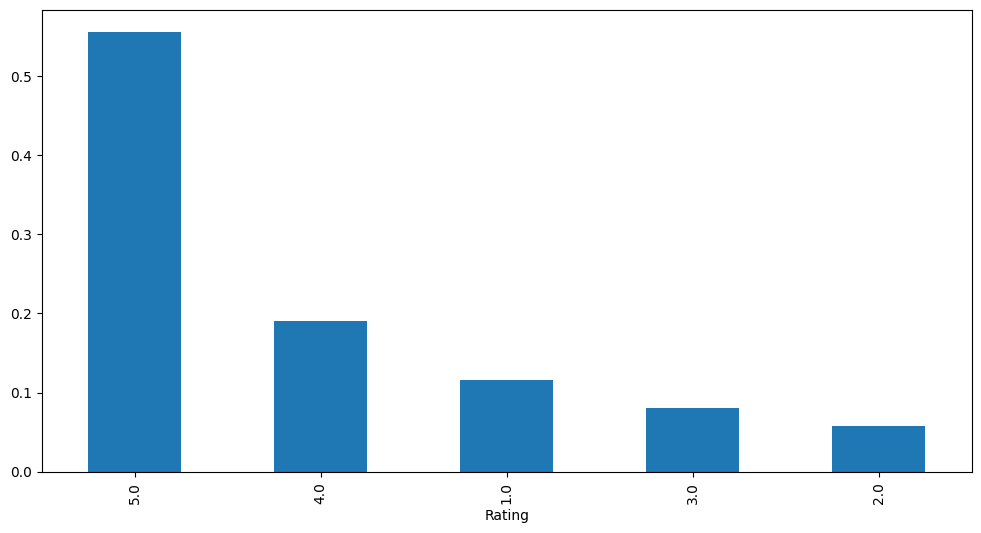

In [7]:
plt.figure(figsize=(12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.xlabel('Rating')
plt.show()

# No of unique users and items

In [8]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['product_id'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


# Rank Based Recommendation System

In [9]:
#Calculate the average rating for each product 
average_rating = df.groupby(['product_id'])['rating'].mean()

#Calculate the count of ratings for each product
count_rating = df.groupby(['product_id'])['rating'].count()

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating,'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating.sort_values(by=['avg_rating'],ascending=False)

final_rating.head(5)

,avg_rating,rating_count
product_id,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


In [10]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_rows(final_rating, n, min_interactions):
    
    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count'] > min_interactions]
    
    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values(by=['avg_rating'],ascending=False)
    
    return list(recommendations.index[:n])


# Recommending top 5 products with 50 minimum interactions based on popularity

In [11]:
top_n_rows(final_rating,5,50)

['B002E6R7NG', 'B004I763AW', 'B003J9QQWU', 'B0043ZLFXE', 'B000TMFYBO']

# Recommending top 5 products with 100 minimum interactions based on popularity

In [12]:
top_n_rows(final_rating,5,100)

['B00GMRCAC6', 'B008I6RVZU', 'B00CG70K78', 'B000053HC5', 'B008VGCT9K']